# Beer Consumption

**D1AED – Análise Estatística para Ciência de Dados**<br />
Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

# 0. Informações Gerais

## 0.1. Conhecendo  o dataset

A cerveja é uma das bebidas mais democráticas e consumidas do mundo. Não sem razão, é perfeita para quase todas as situações, desde *happy hour* até grandes festas de casamento. Se você só de pensar, já tem vontade de tomar cerveja, você não está sozinho.

A verdade é que em todo o mundo, milhares de pessoas consomem a bebida regularmente e também em diferentes situações. Mas você já parou para pensar em quais países mais se consume cerveja no mundo? O primeiro que te veio à cabeça foi a Alemanha? Bem, saiba que não é assim.

A resposta a essa pergunta é surpreendente: a República Tcheca. De acordo com pesquisa da empresa japonesa de bebidas Kirin, o país lidera a tabela de consumo de cerveja per capita há 23 anos consecutivos.

Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os checos beberam 142,4 litros por pessoa. Mas, dado que é improvável que menores de idade contribuam para esse número, é seguro supor que o bebedor de cerveja médio provavelmente consome um pouco mais.

Outros países euroupeus aparecem na lista, a Áustria e Alemanha estão em terceiro e quarto, Polônia em sexto e Irlanda em sétimo. No entanto, há algumas surpresas. Em segundo lugar estão as ilhas Seychelles, uma classificação elevada que atribuiremos ao clima quente e ao grande número de turistas.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos (em média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo uma Meta, com período de um ano.

Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

## 0.2. Atributos:

* `Data`
* `Temperatura Média (°C)`
* `Temperatura Mínima (°C)`
* `Temperatura Máxima (°C)`
* `Precipitação (mm)`
* `Final de Semana (1 = Sim; 0 = Não)`
* `Consumo de Cerveja (litros)`

# 1. Importações

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configurações de estilo dos gráficos
sns.set_theme(style='white', rc={'axes.titlesize': 18, 'axes.labelsize': 14, 'axes.grid.axis': 'y', 'figure.figsize': (20, 6)})
sns.set_palette("muted")

In [26]:
dados = pd.read_csv('Consumo_cerveja.csv', thousands='.', decimal=',')
dados.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0


# 2. Pré-processamento

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


Os dados possuem o campo de `Data` como *object* e os dados de `Final de Semana` como *float*. Além disso, as colunas possuem seu nome separado com espaço. Para facilitar a manipulação dos dados, vamos realizar alguns ajustes

* Alterar os nomes das colunas, substituindo os espaços por `_`
* Converter a coluna `Data` para datetime
* Converter a coluna `Final de Semana` para category

In [28]:
# Renomeando as colunas
dados.columns = dados.columns.str.replace(' ', '_').str.replace('[()]', '', regex=True).str.lower()
dados.columns

Index(['data', 'temperatura_media_c', 'temperatura_minima_c',
       'temperatura_maxima_c', 'precipitacao_mm', 'final_de_semana',
       'consumo_de_cerveja_litros'],
      dtype='object')

In [29]:
# Removendo linhas com todos valores nulos
dados.dropna(axis=0, how='all', inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       365 non-null    object 
 1   temperatura_media_c        365 non-null    float64
 2   temperatura_minima_c       365 non-null    float64
 3   temperatura_maxima_c       365 non-null    float64
 4   precipitacao_mm            365 non-null    float64
 5   final_de_semana            365 non-null    float64
 6   consumo_de_cerveja_litros  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [30]:
# Convertendo a coluna `data` para datetime
dados.data = pd.to_datetime(dados.data)

# Convertendo a coluna `final_de_semana` para tipo categórico
dados.final_de_semana = dados.final_de_semana.astype('int').astype('category')

In [31]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   data                       365 non-null    datetime64[ns]
 1   temperatura_media_c        365 non-null    float64       
 2   temperatura_minima_c       365 non-null    float64       
 3   temperatura_maxima_c       365 non-null    float64       
 4   precipitacao_mm            365 non-null    float64       
 5   final_de_semana            365 non-null    category      
 6   consumo_de_cerveja_litros  365 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 20.4 KB


In [32]:
dados.head()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900.0


# 3. Análise Exploratória

## 3.1 Análise de Atributos

In [33]:
# Estatísticas descritivas
dados.describe().round(2)

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,consumo_de_cerveja_litros
count,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,25401.37
std,3.18,2.83,4.32,12.42,4399.14
min,12.90,10.60,14.50,0.00,14343.00
25%,19.02,15.30,23.80,0.00,22008.00
50%,21.38,17.90,26.90,0.00,24867.00
75%,23.28,19.60,29.40,3.20,28631.00
max,28.86,24.50,36.50,94.80,37937.00


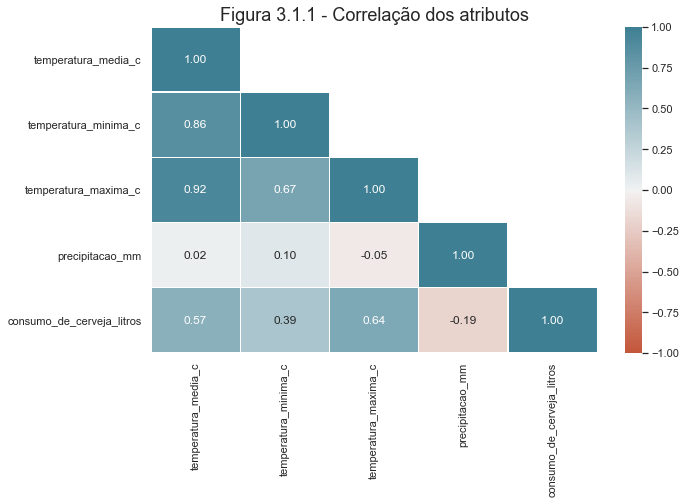

In [34]:
# Mascara de zero
mask = np.zeros_like(dados.corr())
mask[np.triu_indices_from(mask, k=1)] = True

# Heat Map 
plt.figure(figsize=(10,6))
sns.heatmap(dados.corr(), linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f', mask = mask)
plt.title('Figura 3.1.1 - Correlação dos atributos')
plt.show()

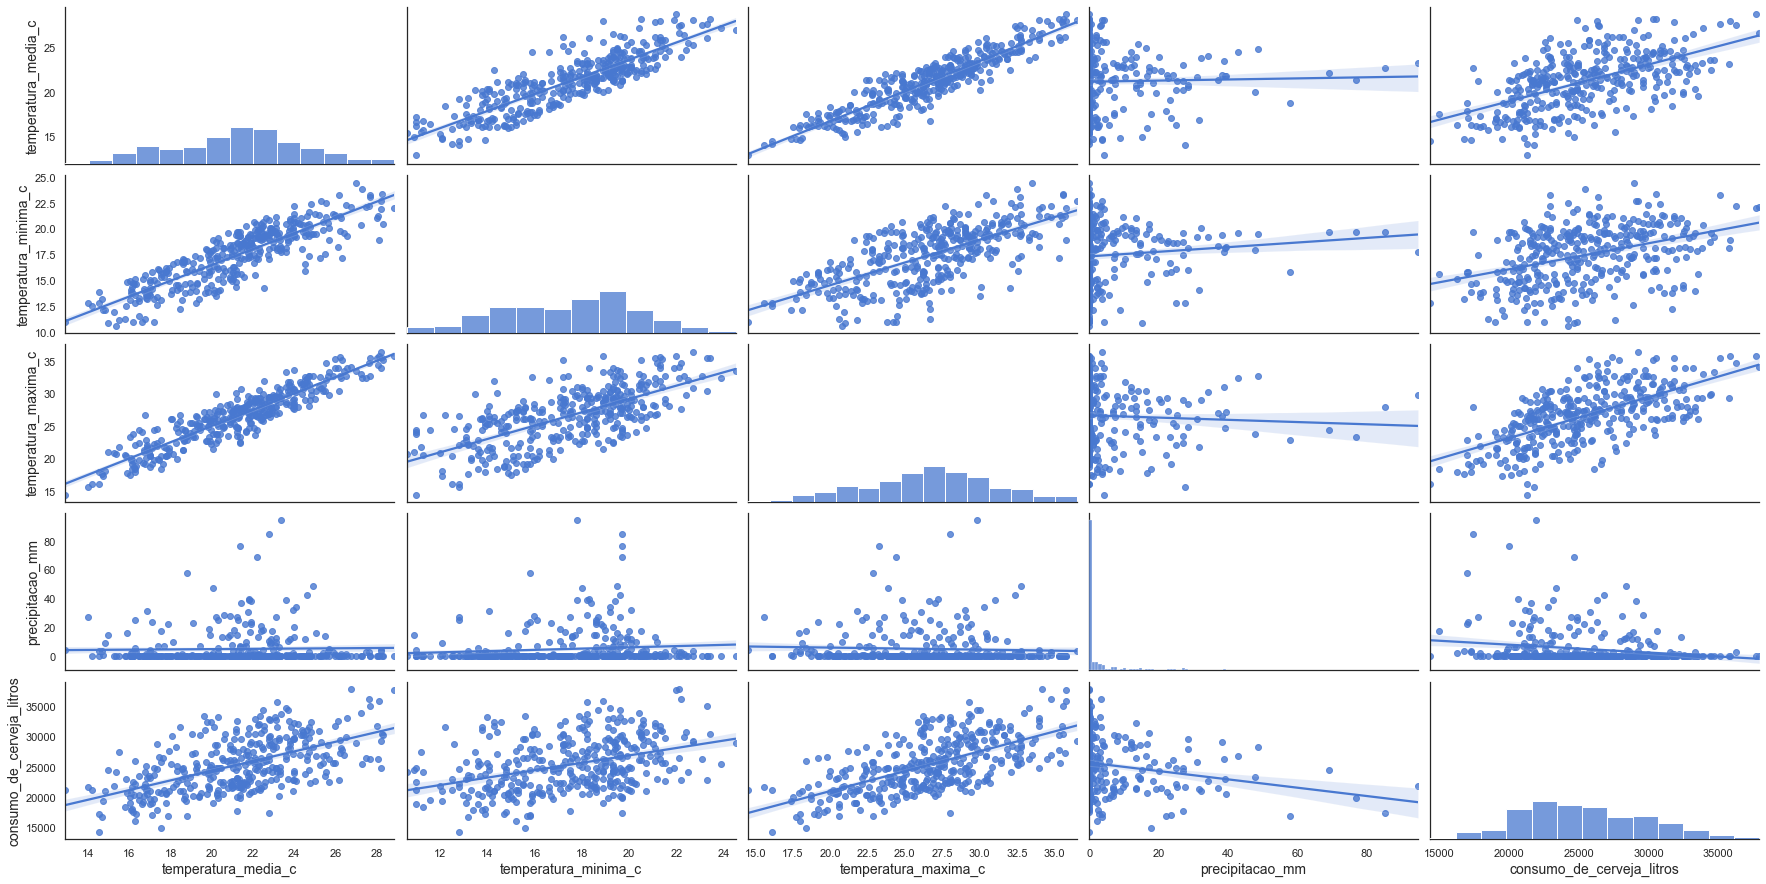

In [35]:
#Pairplot
sns.pairplot(data=dados, kind='reg', aspect=2)

### Conclusão da análise atributos

Podemos notar pelo heatmap e pelo pairplot que os dados de temperatura são muito correlacionados entre si. Além disso, eles também possuem uma correlação positiva em relação o consumo de cerveja, podendo ser um indicativo que temperaturas mais altas levam ao aumento de consumo de cerveja. 

A precipitação não possui correlação com nenhum dos outros atributos

## 3.2 Consumo de cerveja

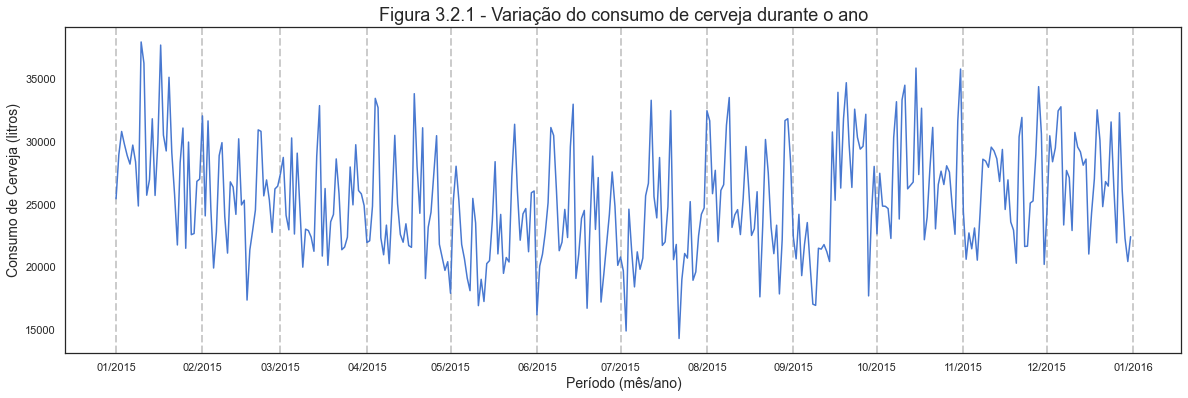

In [36]:
#Lineplot de consumo
ax = sns.lineplot(data=dados, x='data', y='consumo_de_cerveja_litros')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

ax.set(title='Figura 3.2.1 - Variação do consumo de cerveja durante o ano', xlabel='Período (mês/ano)', ylabel='Consumo de Cerveja (litros)')

plt.grid(axis='x', linestyle='--', linewidth=2)

In [37]:
dados.final_de_semana = dados.final_de_semana.astype('boolean').astype('category')

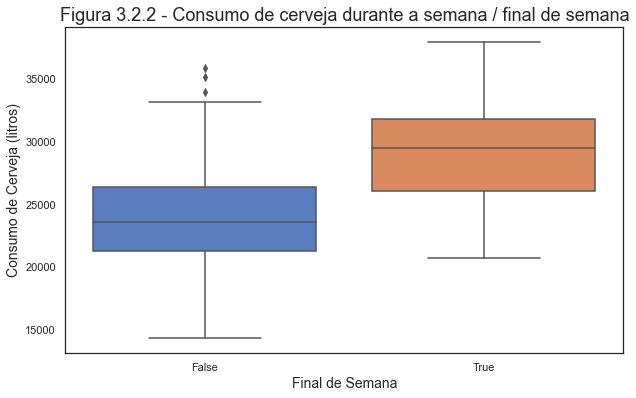

In [38]:
#Box plot por final de semana
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=dados, y='consumo_de_cerveja_litros', x='final_de_semana')
ax.set(title='Figura 3.2.2 - Consumo de cerveja durante a semana / final de semana', xlabel='Final de Semana', ylabel='Consumo de Cerveja (litros)');

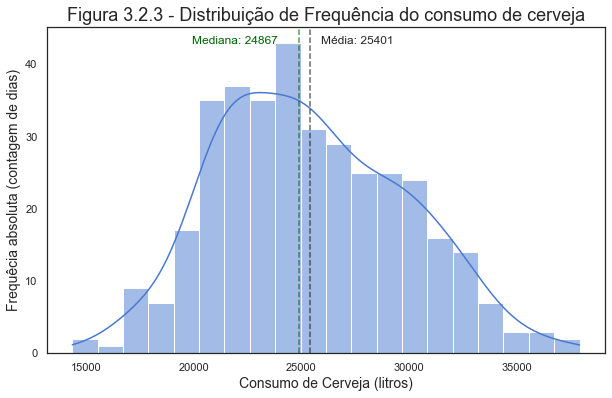

In [39]:
# Plot Histograma
plt.figure(figsize=(10,6))
ax = sns.histplot(data=dados, x='consumo_de_cerveja_litros', bins=20, kde=True)

# Plot média
plt.axvline(dados.consumo_de_cerveja_litros.mean(), color = 'k', linestyle=  'dashed', alpha = 0.65)
min_ylim, max_ylim = plt.ylim()
plt.text(dados.consumo_de_cerveja_litros.mean()*1.02, max_ylim*0.95, 'Média: {:.0f}'.format(dados.consumo_de_cerveja_litros.mean()))

# Plot Mediana
plt.axvline(dados.consumo_de_cerveja_litros.median(), color = 'darkgreen', linestyle=  'dashed', alpha = 0.65)
plt.text(dados.consumo_de_cerveja_litros.median()*0.80, max_ylim*0.95,'Mediana: {:.0f}'.format(dados.consumo_de_cerveja_litros.median()),color='darkgreen' )

ax.set(title='Figura 3.2.3 - Distribuição de Frequência do consumo de cerveja', xlabel='Consumo de Cerveja (litros)', ylabel='Frequêcia absoluta (contagem de dias)');

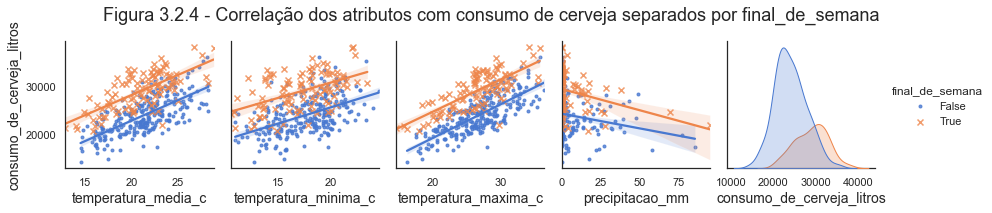

In [40]:
# Pairplot de consumo_de_cerveja_litros
sns.pairplot(data=dados, y_vars='consumo_de_cerveja_litros', kind='reg', hue='final_de_semana', markers = ['.','x'])
plt.suptitle('Figura 3.2.4 - Correlação dos atributos com consumo de cerveja separados por final_de_semana', fontsize=18, y=1.15);

Text(0, 0.5, 'Temperatura')

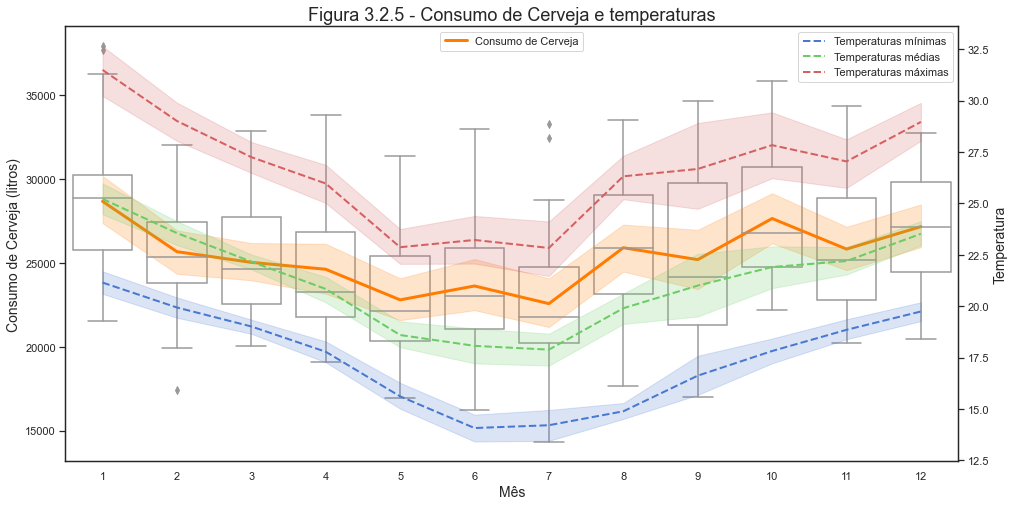

In [41]:
plt.figure(figsize=(16,8))

# Eixo Esquerdo: Boxplot e lineplot do consumo
ax = sns.boxplot(data=dados, y='consumo_de_cerveja_litros', x=dados.data.dt.month, color='w')
sns.lineplot(data=dados, x=dados.data.dt.month - 1, y='consumo_de_cerveja_litros', label='Consumo de Cerveja', linewidth=3, color=sns.color_palette('bright')[1], ax=ax)
ax.set(title='Figura 3.2.5 - Consumo de Cerveja e temperaturas', xlabel='Mês', ylabel='Consumo de Cerveja (litros)')
ax.legend(loc='upper center')

# Eixo Direito: Lineplot das temperaturas
ax2 = ax.twinx()
sns.lineplot(data=dados, x=dados.data.dt.month - 1, y='temperatura_minima_c', label='Temperaturas mínimas', linewidth=2, linestyle='--', color=sns.color_palette()[0], ax=ax2)
sns.lineplot(data=dados, x=dados.data.dt.month - 1, y='temperatura_media_c', label='Temperaturas médias', linewidth=2, linestyle='--', color=sns.color_palette()[2], ax=ax2)
sns.lineplot(data=dados, x=dados.data.dt.month - 1, y='temperatura_maxima_c', label='Temperaturas máximas', linewidth=2, linestyle='--', color=sns.color_palette()[3], ax=ax2)
ax2.set_ylabel('Temperatura')

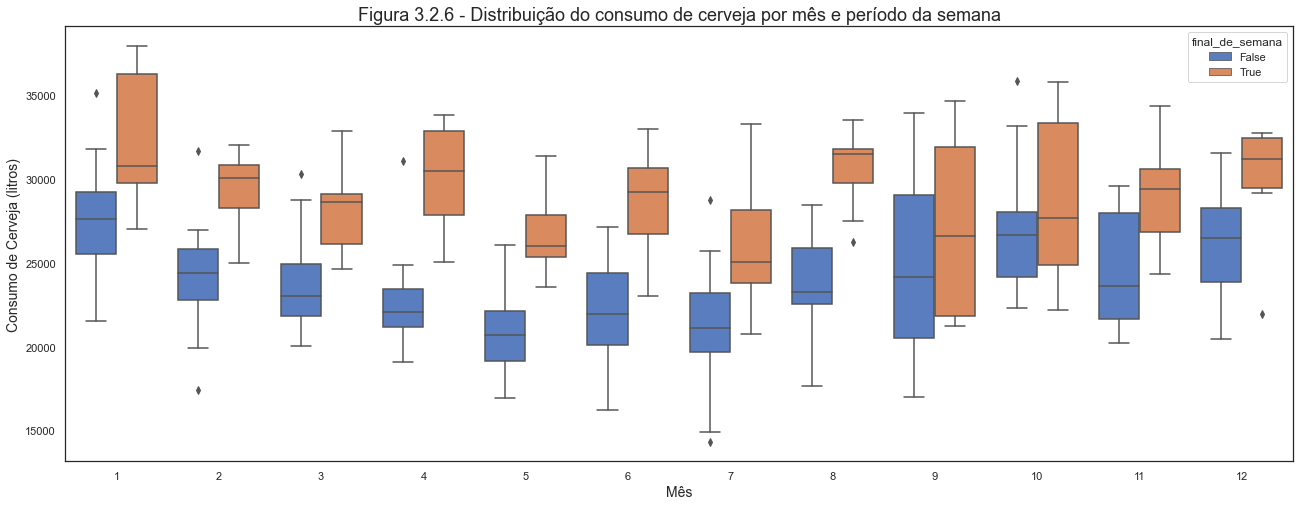

In [42]:
# Boxplot mensal dos valores de consumo separados por final_de_semana
plt.figure(figsize=(22,8))
ax = sns.boxplot(data=dados, y='consumo_de_cerveja_litros', x=dados.data.dt.month, hue='final_de_semana')
ax.set(title='Figura 3.2.6 - Distribuição do consumo de cerveja por mês e período da semana', xlabel='Mês', ylabel='Consumo de Cerveja (litros)');

### Conclusão da análise de consumo

**Figura 3.2.1 - Variação do consumo de cerveja durante o ano:** a distribuição do consumo de cerveja durante os dias tem um comportamento aparentemente sazonal, os picos e vales são alternados de maneira bem distribuida

**Figura 3.2.2 - Consumo de cerveja durante a semana / final de semana:** Os boxplots mostram um deslocamento positivo quando analisados os dados de dia de semana e de final de semana separados. Além da média ser mais alta, os dados de `final de semana` estão todos contemplados pelo intervalo do boxplot. Os valores do `dia de semana` possuem uma amplitude maior nos "bigodes" do boxplot, além de alguns valores outliers.

**Figura 3.2.3 - Distribuição de Frequência do consumo de cerveja**: O consumo de cerveja possui uma distribuição que se assemelha a uma normal. Os valores da `média` e da `mediana` são muito próximos e estão levemente deslocados positivamente do centro do histograma

**Figura 3.2.4 - Correlação dos atributos com consumo de cerveja separados por final_de_semana**: A análise da correlação mostra que o comportamento dos atributos em relação ao consumo de cerveja é parecido quando um dia é `final_de_semana` ou não. Embora esse comportamento seja similar, o consumo de cerveja tem um deslocamento positivo nos dias que são no final de semana.

**Figura 3.2.5 - Consumo de Cerveja e temperaturas**: O Consumo de cerveja acompanha as variações térmicas no decorrer do ano. Os meses mais frios (Maio - Julho) possuem um consumo de cerveja menor, enquanto os meses mais quentes (Outubro - Fevereiro) possuem um consumo maior. Possivelmente fevereiro tem um descolamento negativo por ser um mês mais curto. 

**Figura 3.2.6 - Distribuição do consumo de cerveja por mês e período da semana**: A diferença entre dias de semana e final de semana possui uma diferença mais notável quando segregados por mês. Alguns dos meses análisados possuem um grande descolamento de um boxplot para o outro, como Maio e Agosto. Os mês de Setembro foi o unico mês encontrado que o comportamento é semelhante.

# 4. Modelo de regressão linear

In [43]:
from collections import namedtuple

ModelResults = namedtuple('ModelResults', ['name', 'features', 'params', 'r2_score', 'mae', 'mse', 'rmse', 'y_test', 'y_pred'])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Função para criar modelo
def run_model(df, name, features=None, target='consumo_de_cerveja_litros', model=LinearRegression(), train_size=0.8, random_state=1):
    
    if features == None:
        features = df.columns[df.columns != target]
        
    X = df[features].copy()
    y = df[target].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results = ModelResults(
        name = name,
        features = features,
        params = np.append(model.intercept_, model.coef_),
        r2_score = metrics.r2_score(y_test, y_pred),
        mae = metrics.mean_absolute_error(y_test, y_pred),
        mse = metrics.mean_squared_error(y_test, y_pred),
        rmse = metrics.mean_squared_error(y_test, y_pred, squared=False),
        y_test = y_test,
        y_pred = y_pred
    )
    return results

In [44]:
models_to_test = [
    ('Todos atributos', list(dados.columns[1:-1])),
    ('Sem precipitação', ['temperatura_media_c', 'temperatura_minima_c', 'temperatura_maxima_c', 'final_de_semana']),
    ('Temperatura máxima e fds', ['temperatura_maxima_c', 'final_de_semana']),
    ('Temperatura máxima, precipitação e fds', ['temperatura_media_c', 'final_de_semana', 'precipitacao_mm'])
]

models_to_test
results = []
for model in models_to_test:
    result = run_model(dados, name=model[0], features=model[1])
    results.append(result)
    
#results

C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly

In [45]:
# Parâmetros da regressão
rows = []
for result in results:
    row = pd.DataFrame(columns=['Intercepto'] + result.features)
    row.loc[result.name] = result.params
    rows.append(row)
pd.concat(rows).round(2)

,Intercepto,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana
Todos atributos,6480.71,58.89,-106.97,691.68,-59.51,5162.77
Sem precipitação,6324.76,8.21,-130.88,742.28,NaN,5129.13
Temperatura máxima e fds,5596.11,NaN,NaN,690.12,NaN,5145.51
"Temperatura máxima, precipitação e fds",6621.18,834.53,NaN,NaN,-73.90,5164.76


In [46]:
# Erros
pd.DataFrame(
    [(r.r2_score, r.mae, r.mse, r.rmse) for r in results],
    columns=['R² score', 'MAE', 'MSE', 'RMSE'],
    index=[r.name for r in results]
).round(2)

,R² score,MAE,MSE,RMSE
Todos atributos,0.71,1955.53,5581474.64,2362.51
Sem precipitação,0.69,2009.26,5848664.24,2418.40
Temperatura máxima e fds,0.71,1971.23,5575991.13,2361.35
"Temperatura máxima, precipitação e fds",0.72,1944.92,5397978.50,2323.36


Text(0.5, 0.98, 'Erros de previsão')

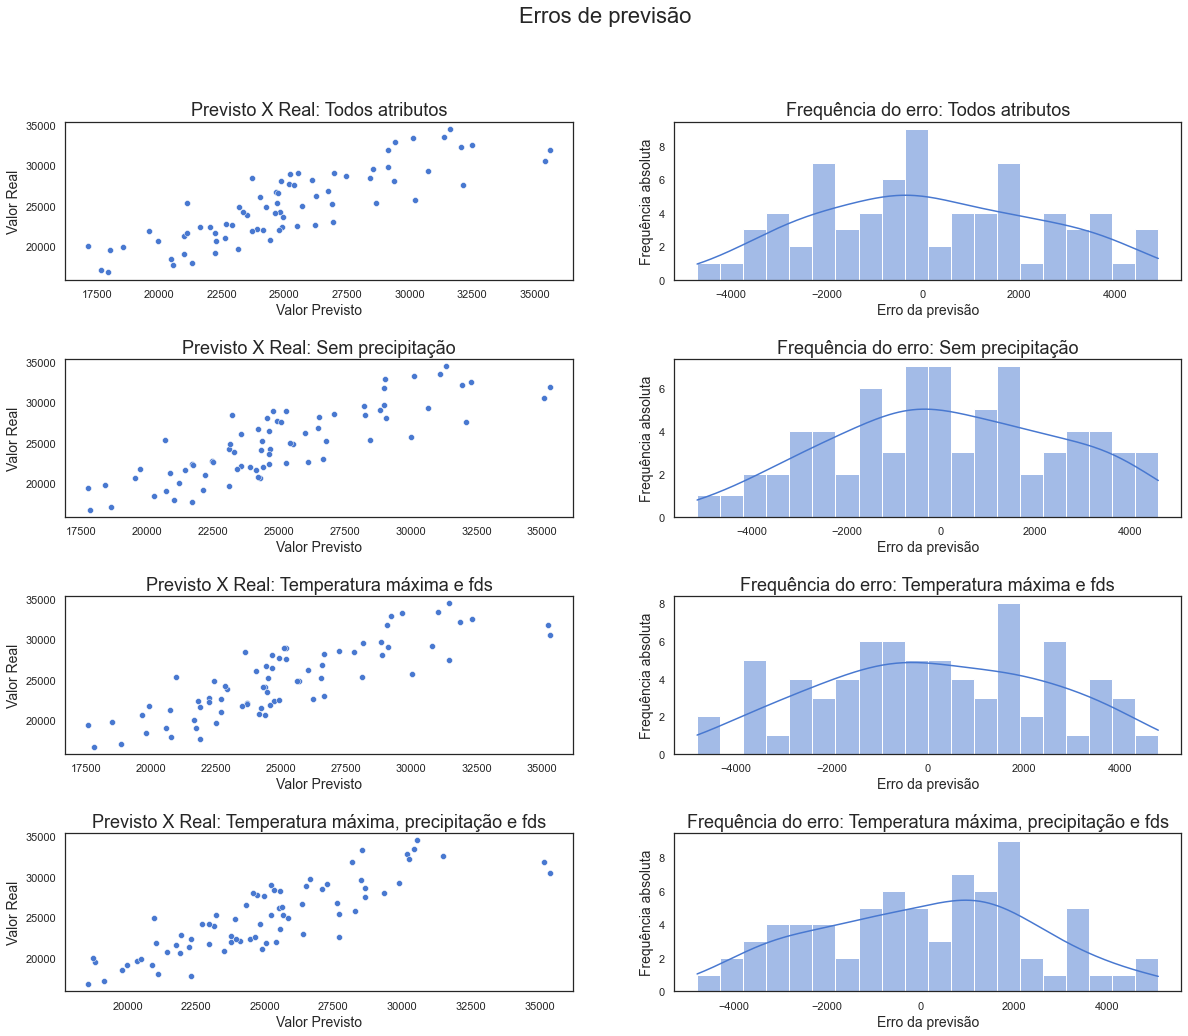

In [47]:
fig, axs = plt.subplots(nrows=len(results), ncols=2, figsize=(20, 4*len(results)))

for i, result in enumerate(results):
    ax = sns.scatterplot(x=result.y_pred, y=result.y_test, ax=axs[i][0])
    ax.set(title=f'Previsto X Real: {result.name}', xlabel='Valor Previsto', ylabel='Valor Real')
    
    ax = sns.histplot(result.y_pred - result.y_test, bins=20, kde=True, ax=axs[i][1])
    ax.set(title=f'Frequência do erro: {result.name}', xlabel='Erro da previsão', ylabel='Frequência absoluta')

plt.subplots_adjust(hspace = 0.5 )
fig.suptitle('Erros de previsão', fontsize=22)

## 4.2 Adicionando coluna de `Mês`

In [48]:
# Adicionando coluna mês
dados['mes'] = dados.data.dt.month

# Reordenando colunas
cols = dados.columns.tolist()
cols = cols[0:1] + cols[-1:] + cols[1:-1]
dados = dados[cols]

dados.head()

,data,mes,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,1,27.30,23.9,32.5,0.0,False,25461.0
1,2015-01-02,1,27.02,24.5,33.5,0.0,False,28972.0
2,2015-01-03,1,24.82,22.4,29.9,0.0,True,30814.0
3,2015-01-04,1,23.98,21.5,28.6,1.2,True,29799.0
4,2015-01-05,1,23.82,21.0,28.3,0.0,False,28900.0


In [49]:
models_to_test_2 = [
    ('Todos atributos + mes', list(dados.columns[1:-1])),
    ('Sem precipitação + mes', ['mes','temperatura_media_c', 'temperatura_minima_c', 'temperatura_maxima_c', 'final_de_semana']),
    ('Temperatura máxima,fds e mes', ['mes','temperatura_maxima_c', 'final_de_semana']),
    ('Temperatura máxima, precipitação, fds e mes', ['mes','temperatura_media_c', 'final_de_semana', 'precipitacao_mm'])
]

models_to_test_2
for model in models_to_test_2:
    result = run_model(dados, name=model[0], features=model[1])
    results.append(result)
    

C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly

In [50]:
# Parâmetros da regressão
rows = []
for result in results:
    row = pd.DataFrame(columns=['Intercepto'] + result.features)
    row.loc[result.name] = result.params
    rows.append(row)
pd.concat(rows).round(2)

,Intercepto,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,mes
Todos atributos,6480.71,58.89,-106.97,691.68,-59.51,5162.77,NaN
Sem precipitação,6324.76,8.21,-130.88,742.28,NaN,5129.13,NaN
Temperatura máxima e fds,5596.11,NaN,NaN,690.12,NaN,5145.51,NaN
"Temperatura máxima, precipitação e fds",6621.18,834.53,NaN,NaN,-73.90,5164.76,NaN
Todos atributos + mes,5367.28,-14.82,-26.72,710.97,-61.03,5186.77,118.51
Sem precipitação + mes,5306.44,-60.15,-58.31,761.05,NaN,5150.21,107.99
"Temperatura máxima,fds e mes",4716.40,NaN,NaN,694.35,NaN,5161.70,118.10
"Temperatura máxima, precipitação, fds e mes",5306.23,849.46,NaN,NaN,-74.95,5189.35,154.29


In [51]:
# Erros
pd.DataFrame(
    [(r.r2_score, r.mae, r.mse, r.rmse) for r in results],
    columns=['R² score', 'MAE', 'MSE', 'RMSE'],
    index=[r.name for r in results]
).round(2)

,R² score,MAE,MSE,RMSE
Todos atributos,0.71,1955.53,5581474.64,2362.51
Sem precipitação,0.69,2009.26,5848664.24,2418.40
Temperatura máxima e fds,0.71,1971.23,5575991.13,2361.35
"Temperatura máxima, precipitação e fds",0.72,1944.92,5397978.50,2323.36
Todos atributos + mes,0.72,1913.94,5309224.16,2304.18
Sem precipitação + mes,0.71,1967.69,5561898.22,2358.37
"Temperatura máxima,fds e mes",0.72,1953.83,5396388.04,2323.01
"Temperatura máxima, precipitação, fds e mes",0.72,1914.78,5417713.18,2327.60


Text(0.5, 0.98, 'Erros de previsão')

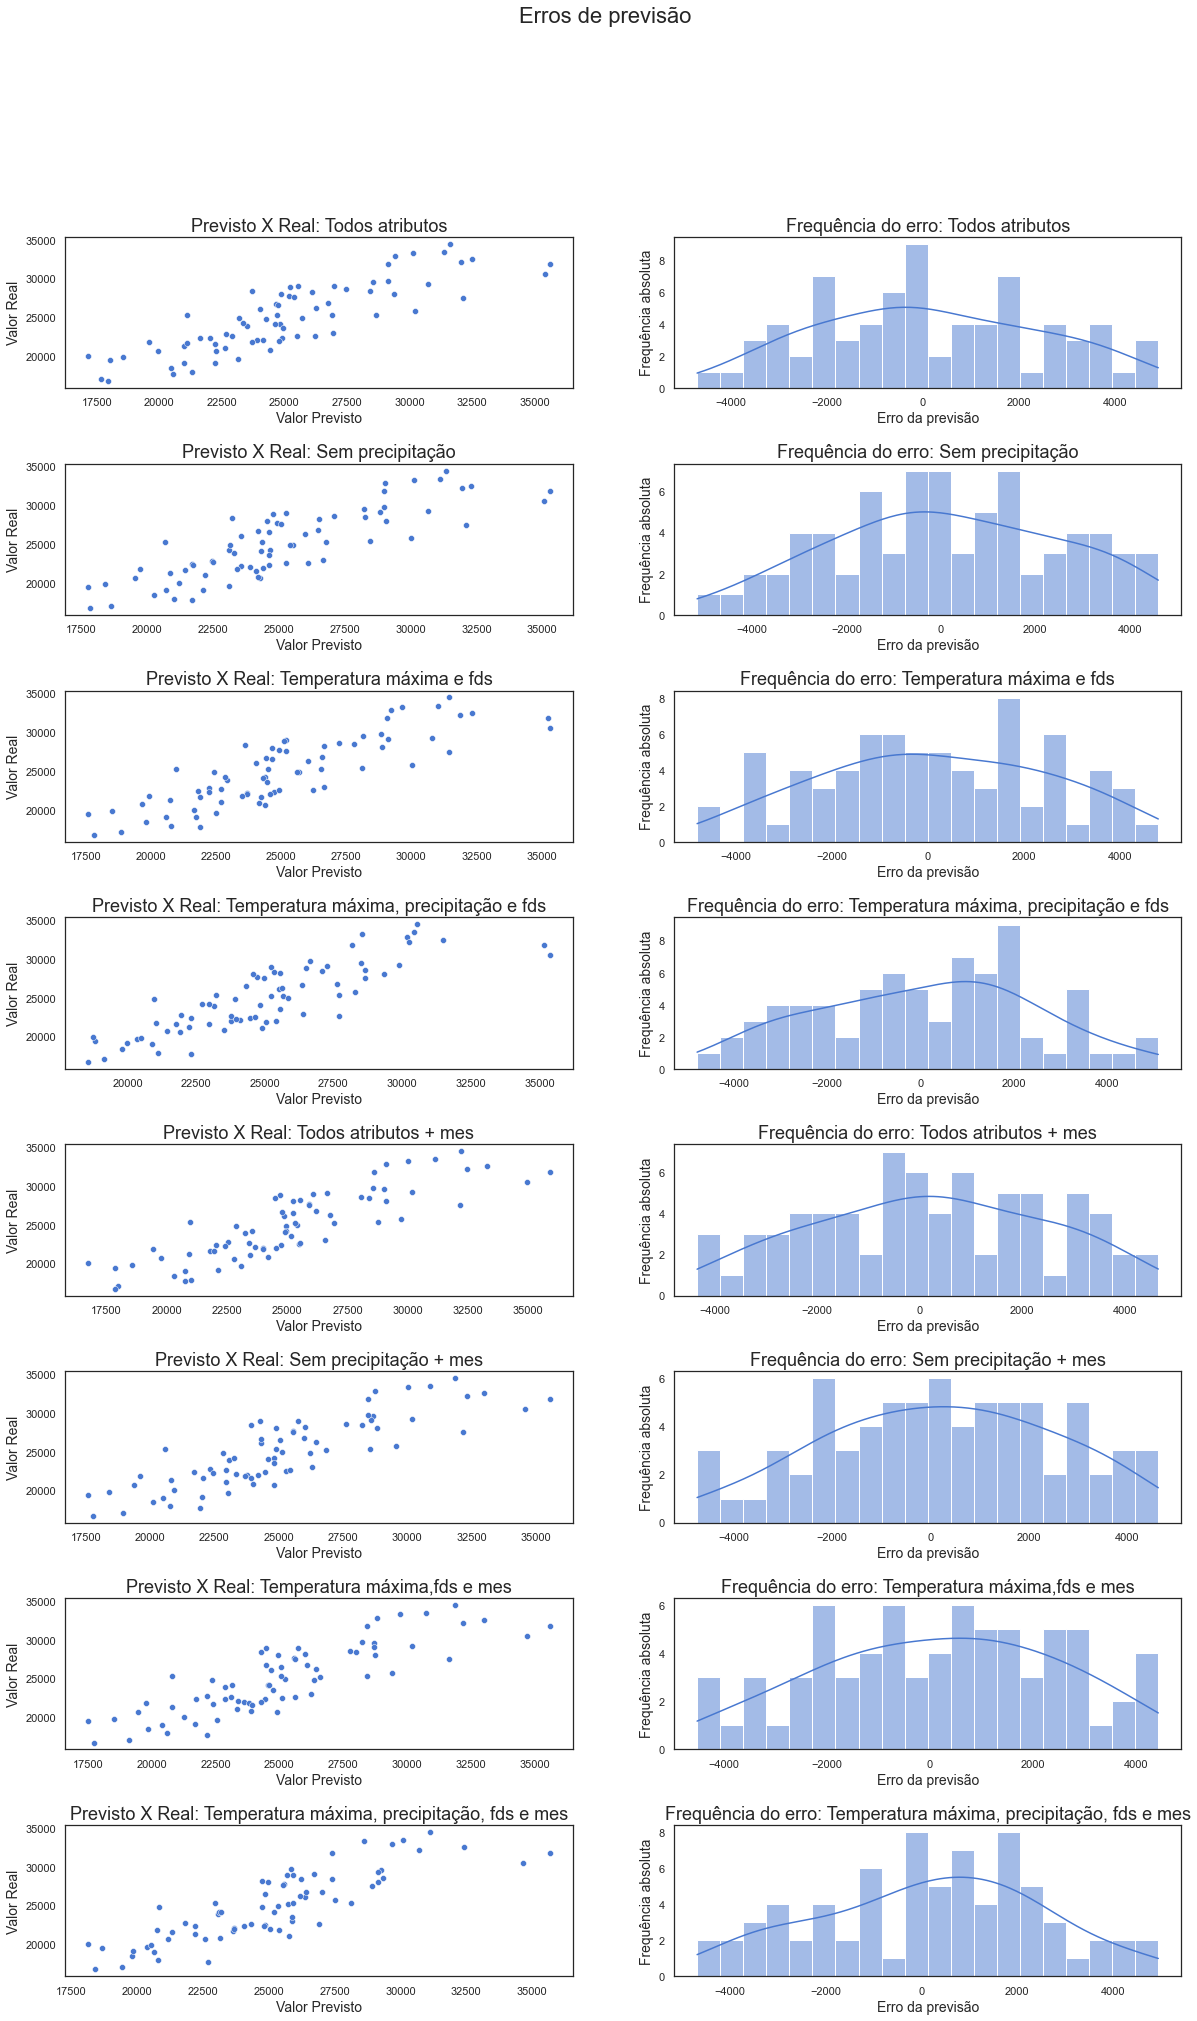

In [52]:
fig, axs = plt.subplots(nrows=len(results), ncols=2, figsize=(20, 4*len(results)))

for i, result in enumerate(results):
    ax = sns.scatterplot(x=result.y_pred, y=result.y_test, ax=axs[i][0])
    ax.set(title=f'Previsto X Real: {result.name}', xlabel='Valor Previsto', ylabel='Valor Real')
    
    ax = sns.histplot(result.y_pred - result.y_test, bins=20, kde=True, ax=axs[i][1])
    ax.set(title=f'Frequência do erro: {result.name}', xlabel='Erro da previsão', ylabel='Frequência absoluta')

plt.subplots_adjust(hspace = 0.5 )
fig.suptitle('Erros de previsão', fontsize=22)